In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import optuna
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import optuna
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [28]:
dataset = pd.read_csv("Processed_dataset.csv")

In [29]:
projection = TSNE(n_components=2).fit_transform(dataset)

In [30]:
birch = Birch(threshold=51.44796950311999, branching_factor=200, n_clusters=4)
birch.fit(dataset)

Birch(branching_factor=200, n_clusters=4, threshold=51.44796950311999)

<Axes: title={'center': 'Birch TSNE Cluster Visualization'}>

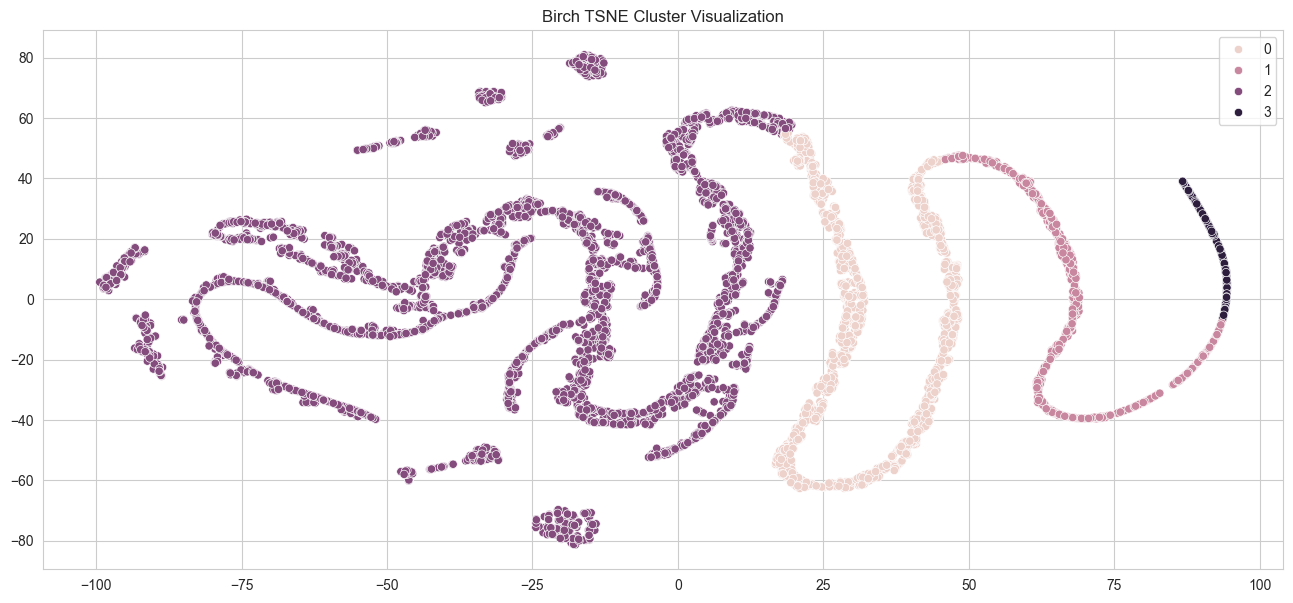

In [31]:
plt.figure(figsize=(16,7))
plt.scatter(projection[:, 0], projection[:, 1], c=birch.labels_, s=10, alpha=1)
plt.title('Birch TSNE Cluster Visualization')
sns.scatterplot(x=projection[:,0],y=projection[:,1],hue=birch.labels_)

### K-Means

<Axes: title={'center': 'K-Means TSNE Cluster Visualization'}>

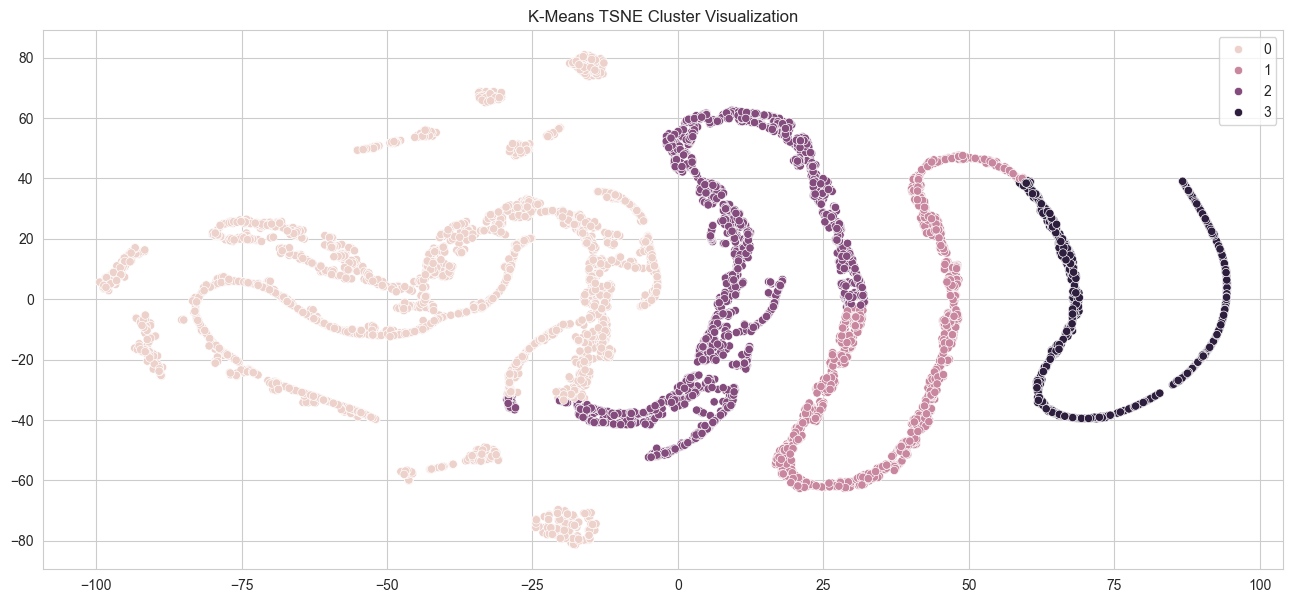

In [32]:
# Initialize K-means
kmeans = KMeans(n_clusters=4, n_init=11, init='random')

# Fit K-means to the data
kmeans.fit(dataset)

# Get cluster labels
labels = kmeans.labels_

# to visualize the clustering results obtained by K-Means Algorithm
plt.figure(figsize=(16,7))
plt.scatter(projection[:, 0], projection[:, 1], c=labels, s=10, alpha=1)
plt.title('K-Means TSNE Cluster Visualization')
sns.scatterplot(x=projection[:,0],y=projection[:,1],hue=labels)

In [33]:
for i in range(4,15):
    birch = Birch(threshold=2.715912648349962, branching_factor=145, n_clusters=i)
    labels = birch.fit_predict(dataset)
    silhouette = silhouette_score(dataset, labels)
    bouldin = metrics.silhouette_score(dataset, labels)
    print("Silhouette score for {} clusters Birch: {} ".format(i, silhouette))
    print('Davies Bouldin Score:' + str(bouldin))

Silhouette score for 4 clusters Birch: 0.5858375952892925 
Davies Bouldin Score:0.5858375952892925
Silhouette score for 5 clusters Birch: 0.5114219533244397 
Davies Bouldin Score:0.5114219533244397
Silhouette score for 6 clusters Birch: 0.5253277009348559 
Davies Bouldin Score:0.5253277009348559
Silhouette score for 7 clusters Birch: 0.5556923080489021 
Davies Bouldin Score:0.5556923080489021
Silhouette score for 8 clusters Birch: 0.5706825570219901 
Davies Bouldin Score:0.5706825570219901
Silhouette score for 9 clusters Birch: 0.5667645072427624 
Davies Bouldin Score:0.5667645072427624
Silhouette score for 10 clusters Birch: 0.5144805017492534 
Davies Bouldin Score:0.5144805017492534
Silhouette score for 11 clusters Birch: 0.5121953982909851 
Davies Bouldin Score:0.5121953982909851
Silhouette score for 12 clusters Birch: 0.5025615500834111 
Davies Bouldin Score:0.5025615500834111
Silhouette score for 13 clusters Birch: 0.5042776446459281 
Davies Bouldin Score:0.5042776446459281
Silhou

In [34]:
birch = Birch(threshold=51.44796950311999, branching_factor=200, n_clusters=4)
labels = birch.fit_predict(dataset)     
print("Silhouette score for {} clusters Birch: {} ".format(4,metrics.silhouette_score(dataset,labels, metric='euclidean').round(3)))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(dataset,labels).round(3)))

Silhouette score for 4 clusters Birch: 0.63 
Davies Bouldin Score:0.476


In [35]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

agglo = AgglomerativeClustering(n_clusters=4, linkage='average', metric='manhattan')
agglo_labels = agglo.fit_predict(dataset)     
print("Silhouette score for Agglo: {} ".format(metrics.silhouette_score(dataset,agglo_labels, metric='euclidean').round(3)))
print('Davies Bouldin Score for Agglo :' + str(metrics.davies_bouldin_score(dataset,agglo_labels).round(3)))

birch = Birch(n_clusters=4, threshold=51.44796950311999, branching_factor=200)
birch_labels = birch.fit_predict(dataset)     
print("Silhouette score for Birch: {} ".format(metrics.silhouette_score(dataset,birch_labels, metric='euclidean').round(3)))
print('Davies Bouldin Score for Birch :' + str(metrics.davies_bouldin_score(dataset,birch_labels).round(3)))

kmeans = KMeans(n_clusters=4, n_init=11, init='random')
kmeans_labels = kmeans.fit_predict(dataset)     
print("Silhouette score for k-means: {} ".format(metrics.silhouette_score(dataset,kmeans_labels, metric='euclidean').round(3)))
print('Davies Bouldin Score for k-means :' + str(metrics.davies_bouldin_score(dataset,kmeans_labels).round(3)))

Silhouette score for Agglo: 0.629 
Davies Bouldin Score for Agglo :0.472
Silhouette score for Birch: 0.63 
Davies Bouldin Score for Birch :0.476
Silhouette score for k-means: 0.602 
Davies Bouldin Score for k-means :0.517
